In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings

In [144]:
df = pd.read_csv('amazon_prime.csv')
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...


In [145]:
df.drop(columns = 'show_id', inplace = True)

In [146]:
df.drop(columns = 'description', inplace = True)

In [147]:
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"


In [148]:
df.isna().sum()

type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
dtype: int64

In [149]:
df['director'].fillna('Unavailable', inplace = True)
df['cast'].fillna('Unavailable', inplace = True)
df['country'].fillna('Unavailable', inplace = True)
df['date_added'] = df['date_added'].ffill()
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

C:\Users\dell\AppData\Local\Temp\ipykernel_15756\3090947033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unavailable', inplace = True)
C:\Users\dell\AppData\Local\Temp\ipykernel_15756\3090947033.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [150]:
df.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      9668 non-null   object
 3   cast          9668 non-null   object
 4   country       9668 non-null   object
 5   date_added    9668 non-null   object
 6   release_year  9668 non-null   int64 
 7   rating        9668 non-null   object
 8   duration      9668 non-null   object
 9   listed_in     9668 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [152]:
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

In [153]:
filtered_cast = df[df['cast']!='Unavailable']
top_cast = filtered_cast['cast'].value_counts().head(10)
top_cast

cast
Maggie Binkley                      56
1                                   34
Anne-Marie Newland                  24
Cassandra Peterson                  21
Grace Tamayo, Erin Webbs            17
Gene Autry, Champion, Gail Davis    12
Stevin John                         11
Gallagher                            9
LB, Aaron Michael                    9
Eddie Izzard                         9
Name: count, dtype: int64

In [154]:
filtered_country = df[df['country'] !='Unavailable']
top_country = filtered_country['country'].value_counts().head(10)
top_country

country
United States                    253
India                            229
United Kingdom                    28
Canada                            16
United Kingdom, United States     12
Spain                              8
Italy                              8
Canada, United States              7
United States, United Kingdom      6
India, United States               5
Name: count, dtype: int64

In [155]:
filtered_director = df[df['director'] !='Unavailable']
top_director = filtered_director['director'].value_counts().head(10)
top_director

director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
1                         16
Brian Volk-Weiss          15
Baeble Music              14
Name: count, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_15756\1557715794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  A = sns.barplot(x=top_cast.values, y=top_cast.index, palette = 'plasma')


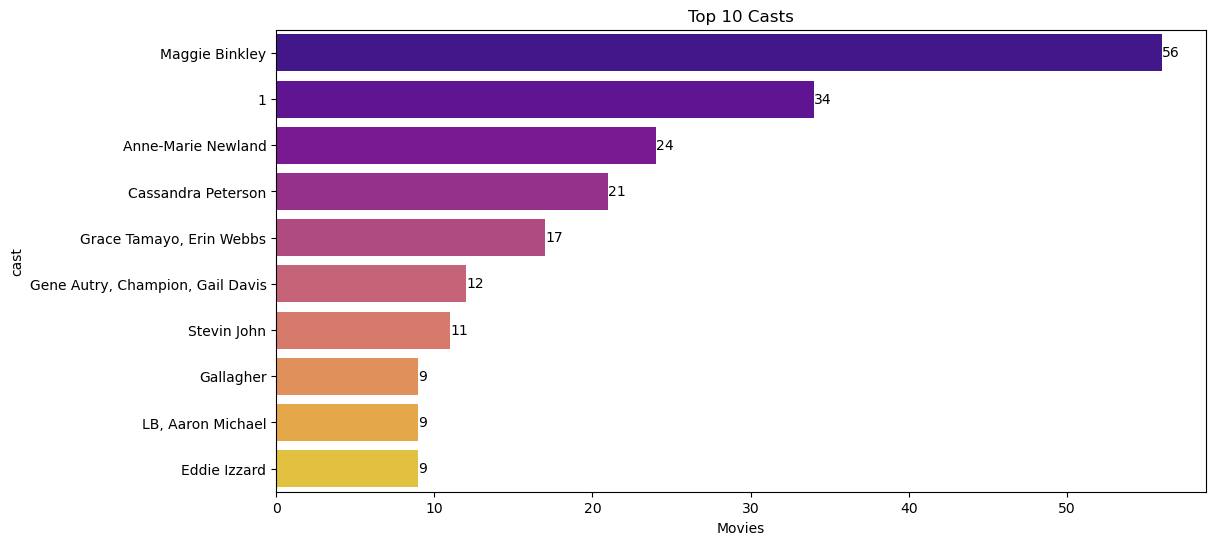

In [173]:
plt.figure(figsize = (12,6))
plt.title('Top 10 Casts')
A = sns.barplot(x=top_cast.values, y=top_cast.index, palette = 'plasma')
for i in A.containers:
    A.bar_label(i)
plt.xlabel('Movies')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_15756\1750688211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  A = sns.barplot(x = top_director.values, y=top_director.index, palette = 'plasma')


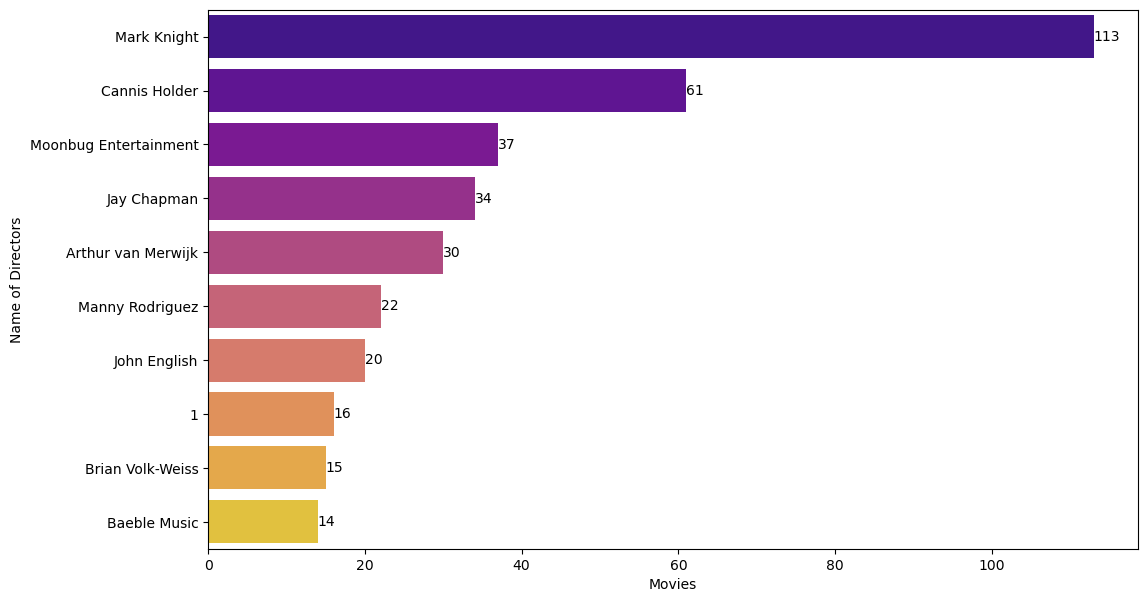

In [157]:
plt.figure(figsize = (12,7))
A = sns.barplot(x = top_director.values, y=top_director.index, palette = 'plasma')
for i in A.containers:
    A.bar_label(i)
plt.xlabel('Movies')
plt.ylabel('Name of Directors')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_15756\824722622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  A=sns.barplot(x=top_country.values, y=top_country.index, palette = 'plasma')


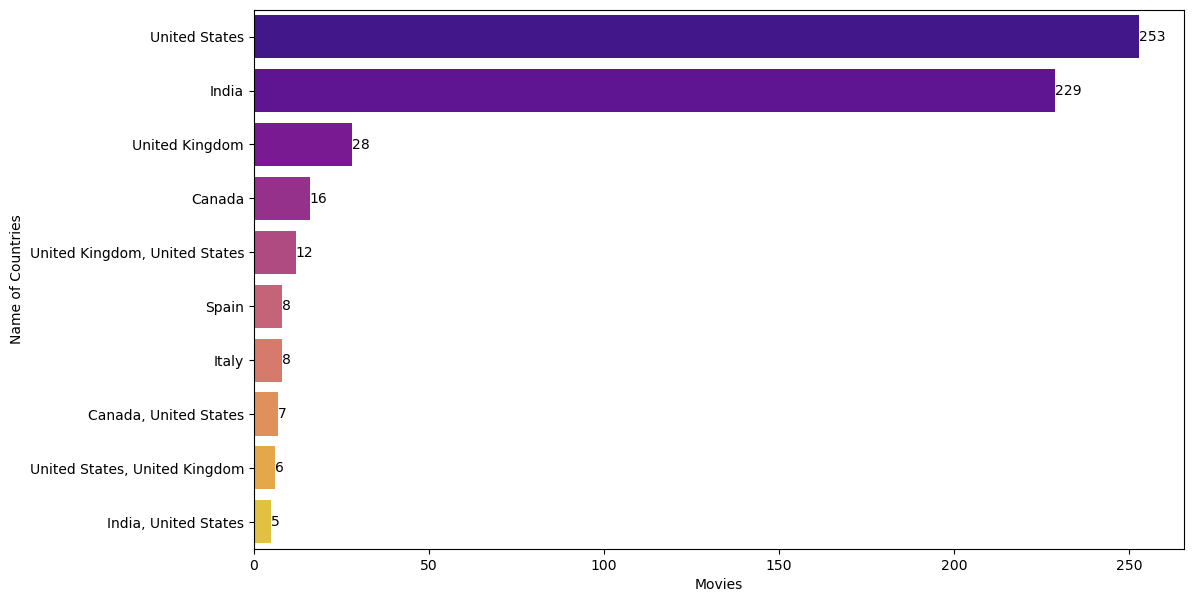

In [158]:
plt.figure(figsize = (12,7))
A=sns.barplot(x=top_country.values, y=top_country.index, palette = 'plasma')
for i in A.containers:
    A.bar_label(i)
plt.xlabel('Movies')
plt.ylabel('Name of Countries')
plt.show()

In [159]:
df['type'].value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_15756\3147276283.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  A = sns.barplot(x=df['type'].value_counts().values, y=df['type'].value_counts().index, palette = 'plasma')


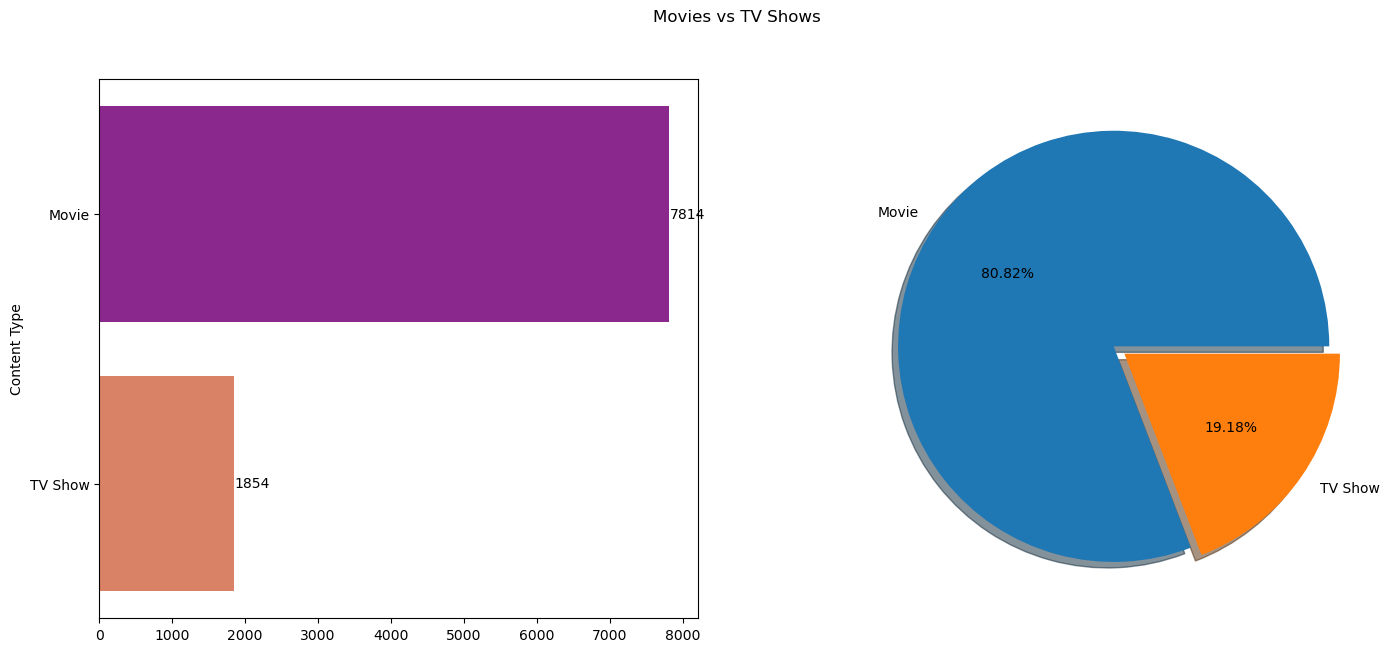

In [182]:
plt.figure(figsize=(17,7))
plt.suptitle('Movies vs TV Shows')

plt.subplot(1,2,1)
A = sns.barplot(x=df['type'].value_counts().values, y=df['type'].value_counts().index, palette = 'plasma')
for i in A.containers:
    A.bar_label(i)
plt.ylabel('Content Type')

plt.subplot(1,2,2)
plt.pie(df['type'].value_counts().values, labels = df['type'].value_counts().index, explode = (0.02,0.04), shadow = True, autopct = "%2.2f%%")
plt.show()

In [161]:
df['rating'].unique()

array(['13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+', 'TV-PG',
       '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG',
       'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

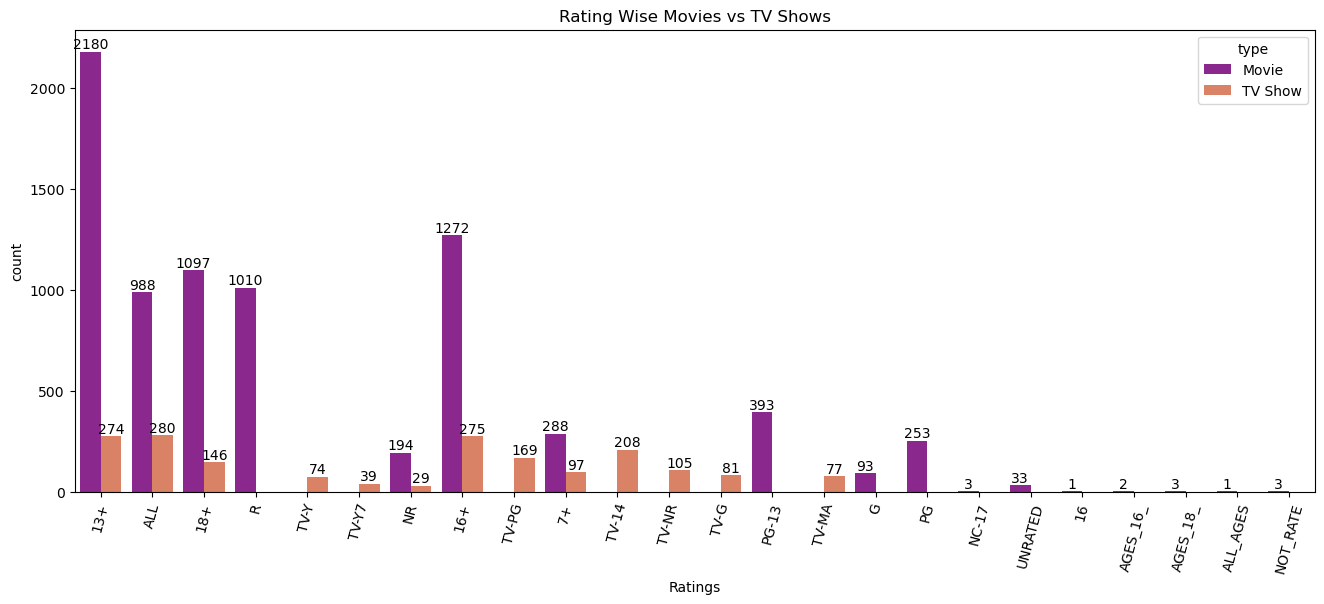

In [168]:
plt.figure(figsize = (16,6))
plt.title('Rating Wise Movies vs TV Shows')
A = sns.countplot(data = df, x = 'rating', hue = 'type', palette = 'plasma')
for i in A.containers:
    A.bar_label(i)
plt.xlabel('Ratings')
plt.xticks(rotation = 75)

plt.show()

In [163]:
top_countries = filtered_country['country'].value_counts()
top_3 = top_countries.nlargest(3).index
top_3

Index(['United States', 'India', 'United Kingdom'], dtype='object', name='country')

In [164]:
df_top_countries = filtered_country[filtered_country['country'].isin(top_3)]
df_top_countries.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense"


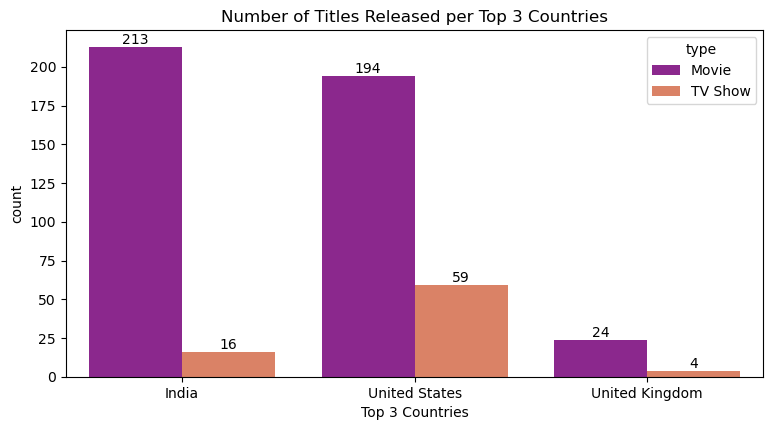

In [165]:
plt.figure(figsize = (9,4.5))
B=sns.countplot(data = df_top_countries, x='country', palette = 'plasma', hue = 'type')
for i in B.containers:
    B.bar_label(i)
plt.xlabel('Top 3 Countries')
plt.title('Number of Titles Released per Top 3 Countries')
plt.show()

In [166]:
df['Genres'] = df['listed_in'].apply(lambda x: x.split(', '))
genres_exploded = df.explode('Genres')
df.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Genres
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama","[Comedy, Drama]"


C:\Users\dell\AppData\Local\Temp\ipykernel_15756\90237831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  A = sns.countplot(data = genres_exploded, x = 'Genres', order = genres_exploded['Genres'].value_counts().index, palette = 'plasma' )


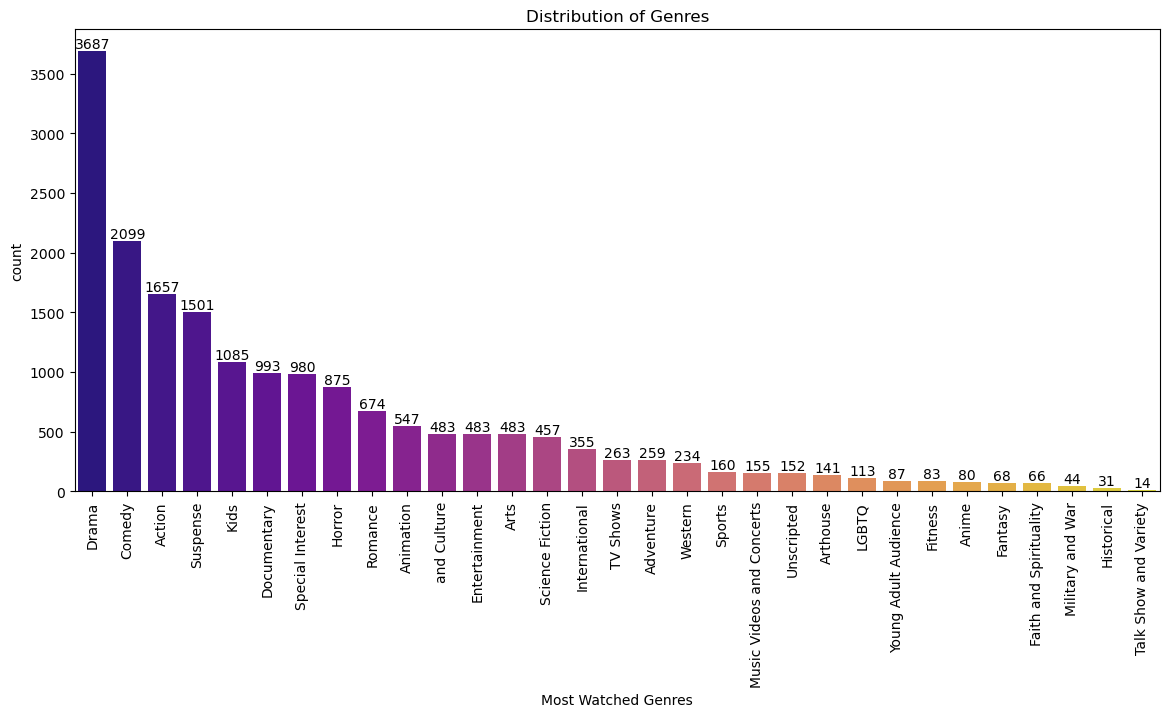

In [167]:
plt.figure(figsize = (14,6))

A = sns.countplot(data = genres_exploded, x = 'Genres', order = genres_exploded['Genres'].value_counts().index, palette = 'plasma' )
for i in A.containers:
    A.bar_label(i)
plt.xticks(rotation = 90)
plt.xlabel('Most Watched Genres')
plt.title('Distribution of Genres')

plt.show()